<h1>Projet 8 - Réaliser un dashboard et assurez une veille technique <span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preliminary" data-toc-modified-id="Preliminary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preliminary</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Graphics-and-Options" data-toc-modified-id="Graphics-and-Options-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Graphics and Options</a></span></li><li><span><a href="#Loading-data" data-toc-modified-id="Loading-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Loading data</a></span></li></ul></li><li><span><a href="#Images-dataset-creation" data-toc-modified-id="Images-dataset-creation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Images dataset creation</a></span><ul class="toc-item"><li><span><a href="#Category-directory-creation" data-toc-modified-id="Category-directory-creation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Category directory creation</a></span></li><li><span><a href="#Images-dataset" data-toc-modified-id="Images-dataset-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Images dataset</a></span></li><li><span><a href="#Display-sample-images-by-label" data-toc-modified-id="Display-sample-images-by-label-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Display sample images by label</a></span></li></ul></li><li><span><a href="#Classification-Efficient-Net" data-toc-modified-id="Classification-Efficient-Net-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Classification Efficient Net</a></span><ul class="toc-item"><li><span><a href="#Functions" data-toc-modified-id="Functions-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Model-creation-and-training" data-toc-modified-id="Model-creation-and-training-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Model creation and training</a></span></li><li><span><a href="#Score" data-toc-modified-id="Score-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Score</a></span></li><li><span><a href="#Features-importance" data-toc-modified-id="Features-importance-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Features importance</a></span></li></ul></li></ul></div>

<div class ="alert alert-block alert-info">
    <b>Notebook : Images classification</b>
</div>

# Preliminary

## Imports

On importe les librairies nécessaires:

In [68]:
import os
import shutil

import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.image import imread
import seaborn as sns
import plotly.express as px

from sklearn import preprocessing
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve
import cv2
from PIL import Image
import tensorflow as tf
from plot_keras_history import show_history, plot_history
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import time
import shap

import warnings
warnings.filterwarnings("ignore")

## Graphics and Options

On définit le style Seaborn par défaut : 

In [10]:
sns.set(style="whitegrid")

## Loading data

In [11]:
data = './data/cleaned/'
os.listdir(data)

['df_category.csv']

In [12]:
fn = data + 'df_category.csv'
df_category = pd.read_csv(fn)
df_category

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,overall_rating,brand,product_specifications,main_category,sub_category_1,sub_category_2,sub_category_3,sub_category_4,sub_category_5,Cluster_cat
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56+00:00,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,...,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Curtains & Accessories,Curtains,Elegance Polyester Multicolor Abstract Eyelet...,NaN,NaN,4
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56+00:00,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,...,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,Baby Bath & Skin,Baby Bath Towels,Sathiyas Baby Bath Towels,"Sathiyas Cotton Bath Towel (3 Bath Towel, Red...",NaN,0
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56+00:00,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,...,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,Baby Bath & Skin,Baby Bath Towels,Eurospa Baby Bath Towels,Eurospa Cotton Terry Face Towel Set (20 PIECE...,NaN,0
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52+00:00,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,...,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Bed Linen,Bedsheets,SANTOSH ROYAL FASHION Bedsheets,SANTOSH ROYAL FASHION Cotton Printed King siz...,NaN,4
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52+00:00,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,...,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,Bed Linen,Bedsheets,Jaipur Print Bedsheets,Jaipur Print Cotton Floral King sized Double ...,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43+00:00,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,...,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,Baby & Kids Gifts,Stickers,"Oren Empower Stickers""]",NaN,NaN,0
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43+00:00,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,...,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,Baby & Kids Gifts,Stickers,"Wallmantra Stickers""]",NaN,NaN,0
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43+00:00,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a20

Répertoire des images :

In [13]:
img_path = r'data/Images/'

# Images dataset creation

## Category directory creation

On crée un répertoire pour chaque catégorie où on retrouvera les images triées par catégorie et séparées en train (90%) / test (10%) :

In [14]:
cat_array = df_category['main_category'].unique()
cat_array

os.mkdir('Datacat')
os.mkdir('Datacat/train')
os.mkdir('Datacat/test')

base_dir ='Flipkart/Images'
train_dir = 'Datacat/train/'
test_dir = 'Datacat/test/'

# Création d'un répertoire par catégorie
for i in range (len(cat_array)):
  os.mkdir('Datacat/train/%s' % cat_array[i])
  os.mkdir('Datacat/test/%s' % cat_array[i])

#Déplacer chaque image dans son réprtoire de sa catégorie
for i in range (len(cat_array)):
  for j in range(len(df_category['main_category'][df_category['main_category']==cat_array[i]])) :
    if(j<(len(df_category['main_category'][df_category['main_category']==cat_array[0]])*0.9)):
      shutil.copy(base_dir+'/%s' % df_category['image'][df_category['main_category']==cat_array[i]].values[j], train_dir +'%s' % cat_array[i])
      os.rename(train_dir+'/%s' %cat_array[i]+'/'+ df_category['image'][df_category['main_category']==cat_array[i]].values[j], train_dir+'%s' %cat_array[i]+'/'+cat_array[i]+'%i'%j+'.jpg')
    else :
      shutil.copy(base_dir+'/%s' % df_category['image'][df_category['main_category']==cat_array[i]].values[j], test_dir +'%s' % cat_array[i])
      os.rename(test_dir+'/%s' %cat_array[i]+'/'+ df_category['image'][df_category['main_category']==cat_array[i]].values[j], test_dir+'%s' %cat_array[i]+'/'+cat_array[i]+'%i'%j+'.jpg')

## Images dataset

On crée 2 datasets train/test pour les images en les renommant par catégorie et en ajoutant un label :

In [15]:
# Chemins des répertoires
train_dir = 'Datacat/train/'
test_dir = 'Datacat/test/'

def collect_images_and_labels(directory):
    image_paths = []
    labels = []
    for category in os.listdir(directory):
        category_path = os.path.join(directory, category)
        if os.path.isdir(category_path):
            for image in os.listdir(category_path):
                image_paths.append(os.path.join(category_path, image))
                labels.append(category)
    return image_paths, labels

# Collecter les images et leurs étiquettes des répertoires d'entraînement et de test
train_image_paths, train_labels = collect_images_and_labels(train_dir)
test_image_paths, test_labels = collect_images_and_labels(test_dir)

# Créer des DataFrame pour l'entraînement et le test
train_data = pd.DataFrame({'image_path': train_image_paths, 'label_name': train_labels})
test_data = pd.DataFrame({'image_path': test_image_paths, 'label_name': test_labels})

# Encoder les étiquettes
le = preprocessing.LabelEncoder()
train_data["label"] = le.fit_transform(train_data["label_name"])
test_data["label"] = le.transform(test_data["label_name"])

# Afficher les premières lignes des DataFrame
train_data.sample(10)

,image_path,label_name,label
663,Datacat/train/Home Decor Festive Needs/Home D...,Home Decor Festive Needs,3
642,Datacat/train/Home Decor Festive Needs/Home D...,Home Decor Festive Needs,3
258,Datacat/train/Home Furnishing/Home Furnishing1...,Home Furnishing,4
926,Datacat/train/Baby Care/Baby Care25.jpg,Baby Care,0
327,Datacat/train/Kitchen Dining/Kitchen Dining8...,Kitchen Dining,5
591,Datacat/train/Home Decor Festive Needs/Home D...,Home Decor Festive Needs,3
887,Datacat/train/Baby Care/Baby Care134.jpg,Baby Care,0
777,Datacat/train/Beauty and Personal Care/Beauty ...,Beauty and Personal Care,1
942,Datacat/train/Baby Care/Baby Care20.jpg,Baby Care,0
764,Datacat/train/Beauty and Personal Care/Beauty ...,Beauty and Personal Care,1


In [16]:
test_data.sample(5)

,image_path,label_name,label
79,Datacat/test/Beauty and Personal Care/Beauty a...,Beauty and Personal Care,1
80,Datacat/test/Beauty and Personal Care/Beauty a...,Beauty and Personal Care,1
5,Datacat/test/Computers/Computers147.jpg,Computers,2
67,Datacat/test/Home Decor Festive Needs/Home De...,Home Decor Festive Needs,3
38,Datacat/test/Kitchen Dining/Kitchen Dining14...,Kitchen Dining,5


In [17]:
train_data.groupby("label_name").count()

,image_path,label
label_name,,
Baby Care,135,135
Beauty and Personal Care,135,135
Computers,135,135
Home Decor Festive Needs,135,135
Home Furnishing,135,135
Kitchen Dining,135,135
Watches,135,135


## Display sample images by label

Baby Care


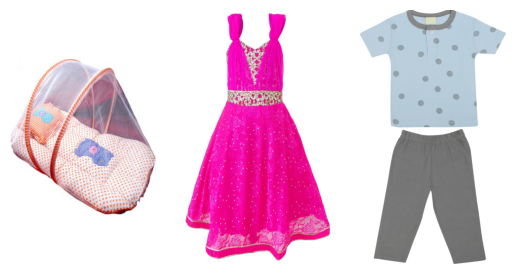

Beauty and Personal Care


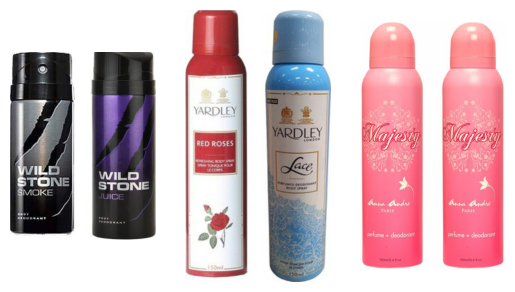

Computers


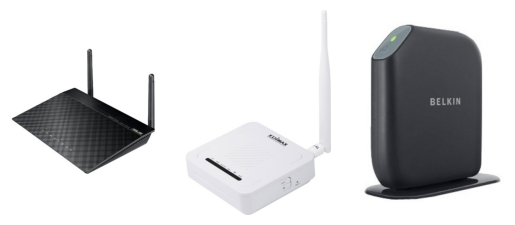

Home Decor  Festive Needs


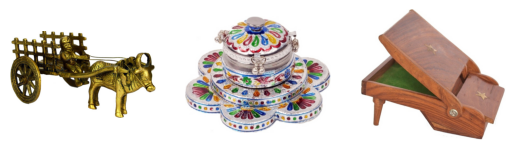

Home Furnishing


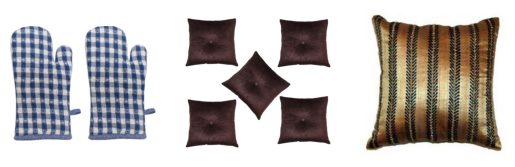

Kitchen  Dining


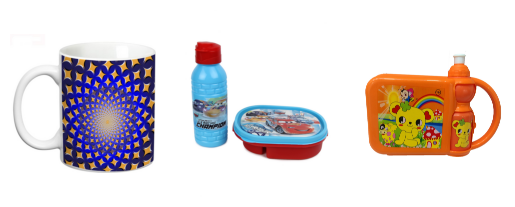

Watches


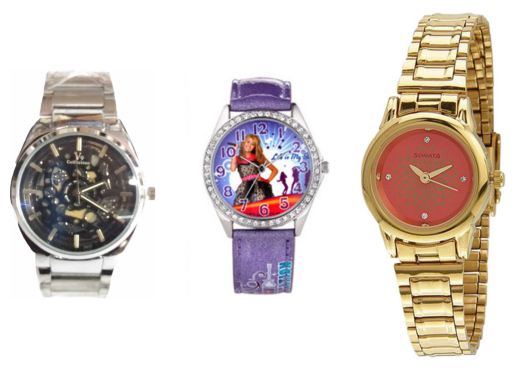

In [18]:
# Fonction pour lister les images par catégorie
def list_fct(name, data):
    return [data["image_path"][i] for i in range(len(data)) if data["label_name"][i] == name]

# Vos catégories
list_labels = ["Baby Care", "Beauty and Personal Care", "Computers", "Home Decor  Festive Needs", "Home Furnishing", "Kitchen  Dining", "Watches"]

# Afficher quelques images de chaque catégorie
for name in list_labels:
    print(name)
    image_paths = list_fct(name, train_data) 
    for i in range(min(3, len(image_paths))):  # Affiche jusqu'à 3 images de la catégorie
        plt.subplot(130 + 1 + i)
        image = imread(image_paths[i])
        plt.imshow(image)
        plt.axis('off')  # Pour masquer les axes
    plt.show()

# Classification Efficient Net

## Functions

On définit la fonction de création des datasets train et test :

In [26]:
batch_size = 32

def dataset_fct(path, validation_split=0, data_type=None) :
    dataset = tf.keras.utils.image_dataset_from_directory(
                    path, labels='inferred', label_mode='categorical',
                    class_names=None, batch_size=batch_size, image_size=(224, 224), shuffle=True, seed=42,
                    validation_split=validation_split, subset=data_type
                    )
    return dataset

train_path = 'Datacat/train'  
test_path = 'Datacat/test'   

dataset_train = dataset_fct(train_path, validation_split=0.25, data_type='training')
dataset_val = dataset_fct(train_path, validation_split=0.25, data_type='validation')
dataset_test = dataset_fct(test_path, validation_split=0, data_type=None)

Found 945 files belonging to 7 classes.
Using 709 files for training.
Found 945 files belonging to 7 classes.
Using 236 files for validation.
Found 105 files belonging to 7 classes.


On définit la fonction de création du modèle Efficient Net :

In [21]:
def create_EfficientNet_model(num_classes):
    # Charger le modèle EfficientNet pré-entraîné sans les couches supérieures
    base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Rendre les couches du modèle pré-entraîné non entraînables
    for layer in base_model.layers:
        layer.trainable = False

    # Ajouter des couches personnalisées
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)  # Remplacez num_classes par le nombre de classes

    # Créer le nouveau modèle
    model = Model(inputs=base_model.input, outputs=predictions)

    # Compiler le modèle
    model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

    print(model.summary())
    
    return model




## Model creation and training

In [29]:
# Création du modèle EfficientNet
model_efficientnet = create_EfficientNet_model(num_classes=7)  

# Création du callback
model_efficientnet_save_path = "./model_efficientnet_best_weights.h5"
checkpoint = ModelCheckpoint(model_efficientnet_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]



Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_2 (Rescaling)     (None, 224, 224, 3)          0         ['input_3[0][0]']             
                                                                                                  
 normalization_1 (Normaliza  (None, 224, 224, 3)          7         ['rescaling_2[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_3 (Rescaling)     (None, 224, 224, 3)          0         ['normalization_1[0][0]'

                                                                                                  
 block1c_dwconv (DepthwiseC  (None, 112, 112, 32)         288       ['block1b_add[0][0]']         
 onv2D)                                                                                           
                                                                                                  
 block1c_bn (BatchNormaliza  (None, 112, 112, 32)         128       ['block1c_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block1c_activation (Activa  (None, 112, 112, 32)         0         ['block1c_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block1c_s

 tion)                                                                                            
                                                                                                  
 block2a_activation (Activa  (None, 56, 56, 192)          0         ['block2a_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block2a_se_squeeze (Global  (None, 192)                  0         ['block2a_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block2a_se_reshape (Reshap  (None, 1, 1, 192)            0         ['block2a_se_squeeze[0][0]']  
 e)                                                                                               
          

                                                                                                  
 block2c_se_squeeze (Global  (None, 288)                  0         ['block2c_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block2c_se_reshape (Reshap  (None, 1, 1, 288)            0         ['block2c_se_squeeze[0][0]']  
 e)                                                                                               
                                                                                                  
 block2c_se_reduce (Conv2D)  (None, 1, 1, 12)             3468      ['block2c_se_reshape[0][0]']  
                                                                                                  
 block2c_se_expand (Conv2D)  (None, 1, 1, 288)            3744      ['block2c_se_reduce[0][0]']   
          

 tion)                                                                                            
                                                                                                  
 block2e_se_squeeze (Global  (None, 288)                  0         ['block2e_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block2e_se_reshape (Reshap  (None, 1, 1, 288)            0         ['block2e_se_squeeze[0][0]']  
 e)                                                                                               
                                                                                                  
 block2e_se_reduce (Conv2D)  (None, 1, 1, 12)             3468      ['block2e_se_reshape[0][0]']  
                                                                                                  
 block2e_s

 block2g_activation (Activa  (None, 56, 56, 288)          0         ['block2g_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block2g_se_squeeze (Global  (None, 288)                  0         ['block2g_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block2g_se_reshape (Reshap  (None, 1, 1, 288)            0         ['block2g_se_squeeze[0][0]']  
 e)                                                                                               
                                                                                                  
 block2g_se_reduce (Conv2D)  (None, 1, 1, 12)             3468      ['block2g_se_reshape[0][0]']  
          

 tion)                                                                                            
                                                                                                  
 block3b_se_squeeze (Global  (None, 480)                  0         ['block3b_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block3b_se_reshape (Reshap  (None, 1, 1, 480)            0         ['block3b_se_squeeze[0][0]']  
 e)                                                                                               
                                                                                                  
 block3b_se_reduce (Conv2D)  (None, 1, 1, 20)             9620      ['block3b_se_reshape[0][0]']  
                                                                                                  
 block3b_s

 block3d_activation (Activa  (None, 28, 28, 480)          0         ['block3d_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block3d_se_squeeze (Global  (None, 480)                  0         ['block3d_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block3d_se_reshape (Reshap  (None, 1, 1, 480)            0         ['block3d_se_squeeze[0][0]']  
 e)                                                                                               
                                                                                                  
 block3d_se_reduce (Conv2D)  (None, 1, 1, 20)             9620      ['block3d_se_reshape[0][0]']  
          

                                                                                                  
 block3f_activation (Activa  (None, 28, 28, 480)          0         ['block3f_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block3f_se_squeeze (Global  (None, 480)                  0         ['block3f_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block3f_se_reshape (Reshap  (None, 1, 1, 480)            0         ['block3f_se_squeeze[0][0]']  
 e)                                                                                               
                                                                                                  
 block3f_s

 onv2D)                                                                                           
                                                                                                  
 block4a_bn (BatchNormaliza  (None, 14, 14, 480)          1920      ['block4a_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block4a_activation (Activa  (None, 14, 14, 480)          0         ['block4a_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block4a_se_squeeze (Global  (None, 480)                  0         ['block4a_activation[0][0]']  
 AveragePooling2D)                                                                                
          

                                                                                                  
 block4c_activation (Activa  (None, 14, 14, 960)          0         ['block4c_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block4c_se_squeeze (Global  (None, 960)                  0         ['block4c_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block4c_se_reshape (Reshap  (None, 1, 1, 960)            0         ['block4c_se_squeeze[0][0]']  
 e)                                                                                               
                                                                                                  
 block4c_s

 tion)                                                                                            
                                                                                                  
 block4e_activation (Activa  (None, 14, 14, 960)          0         ['block4e_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block4e_se_squeeze (Global  (None, 960)                  0         ['block4e_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block4e_se_reshape (Reshap  (None, 1, 1, 960)            0         ['block4e_se_squeeze[0][0]']  
 e)                                                                                               
          

 block4g_bn (BatchNormaliza  (None, 14, 14, 960)          3840      ['block4g_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block4g_activation (Activa  (None, 14, 14, 960)          0         ['block4g_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block4g_se_squeeze (Global  (None, 960)                  0         ['block4g_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block4g_se_reshape (Reshap  (None, 1, 1, 960)            0         ['block4g_se_squeeze[0][0]']  
 e)       

                                                                                                  
 block4i_bn (BatchNormaliza  (None, 14, 14, 960)          3840      ['block4i_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block4i_activation (Activa  (None, 14, 14, 960)          0         ['block4i_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block4i_se_squeeze (Global  (None, 960)                  0         ['block4i_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block4i_s

 onv2D)                                                             [0]']                         
                                                                                                  
 block5a_bn (BatchNormaliza  (None, 14, 14, 960)          3840      ['block5a_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block5a_activation (Activa  (None, 14, 14, 960)          0         ['block5a_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block5a_se_squeeze (Global  (None, 960)                  0         ['block5a_activation[0][0]']  
 AveragePooling2D)                                                                                
          

                                                                                                  
 block5c_activation (Activa  (None, 14, 14, 1344)         0         ['block5c_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block5c_se_squeeze (Global  (None, 1344)                 0         ['block5c_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block5c_se_reshape (Reshap  (None, 1, 1, 1344)           0         ['block5c_se_squeeze[0][0]']  
 e)                                                                                               
                                                                                                  
 block5c_s

 tion)                                                                                            
                                                                                                  
 block5e_activation (Activa  (None, 14, 14, 1344)         0         ['block5e_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block5e_se_squeeze (Global  (None, 1344)                 0         ['block5e_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block5e_se_reshape (Reshap  (None, 1, 1, 1344)           0         ['block5e_se_squeeze[0][0]']  
 e)                                                                                               
          

 block5g_bn (BatchNormaliza  (None, 14, 14, 1344)         5376      ['block5g_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block5g_activation (Activa  (None, 14, 14, 1344)         0         ['block5g_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block5g_se_squeeze (Global  (None, 1344)                 0         ['block5g_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block5g_se_reshape (Reshap  (None, 1, 1, 1344)           0         ['block5g_se_squeeze[0][0]']  
 e)       

                                                                                                  
 block5i_bn (BatchNormaliza  (None, 14, 14, 1344)         5376      ['block5i_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block5i_activation (Activa  (None, 14, 14, 1344)         0         ['block5i_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block5i_se_squeeze (Global  (None, 1344)                 0         ['block5i_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block5i_s

 dding2D)                                                           [0]']                         
                                                                                                  
 block6a_dwconv (DepthwiseC  (None, 7, 7, 1344)           33600     ['block6a_dwconv_pad[0][0]']  
 onv2D)                                                                                           
                                                                                                  
 block6a_bn (BatchNormaliza  (None, 7, 7, 1344)           5376      ['block6a_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block6a_activation (Activa  (None, 7, 7, 1344)           0         ['block6a_bn[0][0]']          
 tion)                                                                                            
          

                                                                                                  
 block6c_bn (BatchNormaliza  (None, 7, 7, 2304)           9216      ['block6c_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block6c_activation (Activa  (None, 7, 7, 2304)           0         ['block6c_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block6c_se_squeeze (Global  (None, 2304)                 0         ['block6c_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block6c_s

 onv2D)                                                             [0]']                         
                                                                                                  
 block6e_bn (BatchNormaliza  (None, 7, 7, 2304)           9216      ['block6e_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block6e_activation (Activa  (None, 7, 7, 2304)           0         ['block6e_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block6e_se_squeeze (Global  (None, 2304)                 0         ['block6e_activation[0][0]']  
 AveragePooling2D)                                                                                
          

 block6g_dwconv (DepthwiseC  (None, 7, 7, 2304)           57600     ['block6g_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block6g_bn (BatchNormaliza  (None, 7, 7, 2304)           9216      ['block6g_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block6g_activation (Activa  (None, 7, 7, 2304)           0         ['block6g_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block6g_se_squeeze (Global  (None, 2304)                 0         ['block6g_activation[0][0]']  
 AveragePo

                                                                                                  
 block6i_dwconv (DepthwiseC  (None, 7, 7, 2304)           57600     ['block6i_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block6i_bn (BatchNormaliza  (None, 7, 7, 2304)           9216      ['block6i_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block6i_activation (Activa  (None, 7, 7, 2304)           0         ['block6i_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block6i_s

 (Activation)                                                                                     
                                                                                                  
 block6k_dwconv (DepthwiseC  (None, 7, 7, 2304)           57600     ['block6k_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block6k_bn (BatchNormaliza  (None, 7, 7, 2304)           9216      ['block6k_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block6k_activation (Activa  (None, 7, 7, 2304)           0         ['block6k_bn[0][0]']          
 tion)                                                                                            
          

 block6m_expand_activation   (None, 7, 7, 2304)           0         ['block6m_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block6m_dwconv (DepthwiseC  (None, 7, 7, 2304)           57600     ['block6m_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block6m_bn (BatchNormaliza  (None, 7, 7, 2304)           9216      ['block6m_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block6m_activation (Activa  (None, 7, 7, 2304)           0         ['block6m_bn[0][0]']          
 tion)    

 onv2D)                                                             [0]']                         
                                                                                                  
 block7b_bn (BatchNormaliza  (None, 7, 7, 3840)           15360     ['block7b_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block7b_activation (Activa  (None, 7, 7, 3840)           0         ['block7b_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block7b_se_squeeze (Global  (None, 3840)                 0         ['block7b_activation[0][0]']  
 AveragePooling2D)                                                                                
          

 block7d_dwconv (DepthwiseC  (None, 7, 7, 3840)           34560     ['block7d_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block7d_bn (BatchNormaliza  (None, 7, 7, 3840)           15360     ['block7d_dwconv[0][0]']      
 tion)                                                                                            
                                                                                                  
 block7d_activation (Activa  (None, 7, 7, 3840)           0         ['block7d_bn[0][0]']          
 tion)                                                                                            
                                                                                                  
 block7d_se_squeeze (Global  (None, 3840)                 0         ['block7d_activation[0][0]']  
 AveragePo

In [30]:
# Entraînement du modèle
history_efficientnet = model_efficientnet.fit(dataset_train,
                                              validation_data=dataset_val,
                                              batch_size=batch_size,
                                              epochs=50,
                                              callbacks=callbacks_list,
                                              verbose=1)

Epoch 1/50
23/23 [==============================] - ETA: 0s - loss: 0.7569 - accuracy: 0.7729 
Epoch 1: val_loss improved from inf to 0.38391, saving model to ./model_efficientnet_best_weights.h5
23/23 [==============================] - 537s 22s/step - loss: 0.7569 - accuracy: 0.7729 - val_loss: 0.3839 - val_accuracy: 0.8941
Epoch 2/50
23/23 [==============================] - ETA: 0s - loss: 0.2914 - accuracy: 0.9365 
Epoch 2: val_loss improved from 0.38391 to 0.33213, saving model to ./model_efficientnet_best_weights.h5
23/23 [==============================] - 473s 20s/step - loss: 0.2914 - accuracy: 0.9365 - val_loss: 0.3321 - val_accuracy: 0.8983
Epoch 3/50
23/23 [==============================] - ETA: 0s - loss: 0.1788 - accuracy: 0.9563 
Epoch 3: val_loss improved from 0.33213 to 0.31013, saving model to ./model_efficientnet_best_weights.h5
23/23 [==============================] - 499s 22s/step - loss: 0.1788 - accuracy: 0.9563 - val_loss: 0.3101 - val_accuracy: 0.9110
Epoch 4/50


## Score

In [31]:
# Score du dernier epoch

loss, accuracy = model_efficientnet.evaluate(dataset_train, verbose=True)
print("Training Accuracy   : {:.4f}".format(accuracy))
print()
loss, accuracy = model_efficientnet.evaluate(dataset_val, verbose=True)
print("Validation Accuracy :  {:.4f}".format(accuracy))

23/23 [==============================] - 223s 9s/step - loss: 0.0250 - accuracy: 0.9887
Training Accuracy   : 0.9887

8/8 [==============================] - 76s 9s/step - loss: 0.3474 - accuracy: 0.9025
Validation Accuracy :  0.9025


In [32]:
# Score de l'epoch optimal

model_efficientnet.load_weights(model_efficientnet_save_path)

loss, accuracy = model_efficientnet.evaluate(dataset_val, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model_efficientnet.evaluate(dataset_test, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))

Validation Accuracy :  0.9110
Test Accuracy       :  0.7238


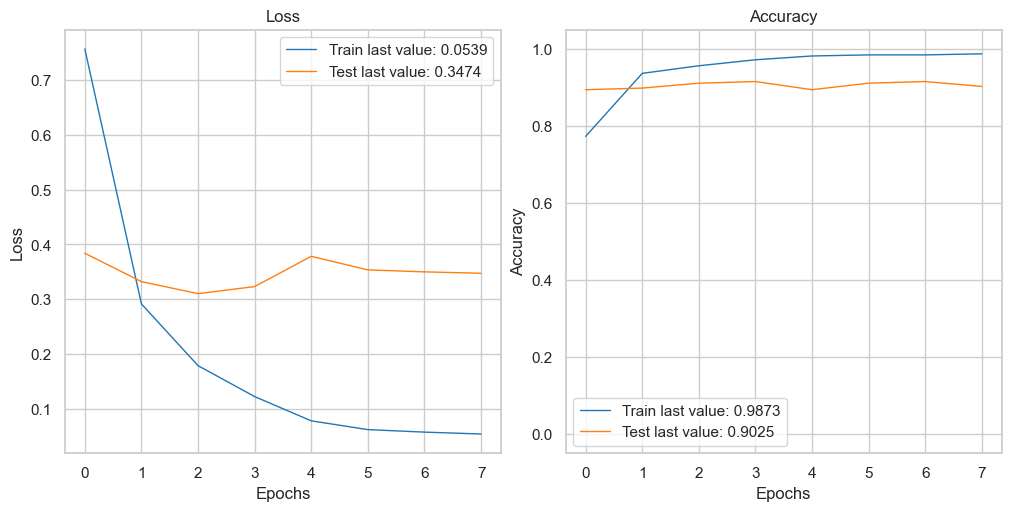

In [33]:
show_history(history_efficientnet)
plot_history(history_efficientnet, path="standard.png")
plt.close()

## Features importance

In [71]:
# Préparation des données pour SHAP
image_path = "./Datacat/train/Beauty and Personal Care/Beauty and Personal Care7.jpg"
image = Image.open(image_path).resize((224, 224))
img = np.expand_dims(image, axis=0)

  0%|          | 0/998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [11:11, 671.33s/it]                           


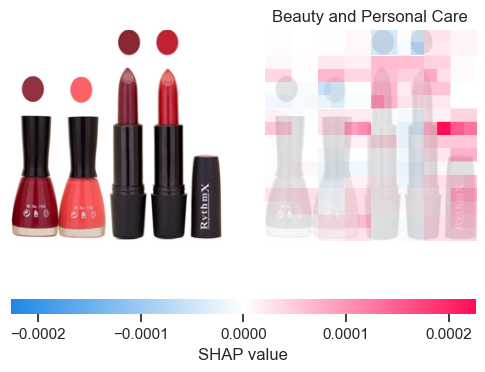

In [73]:
# Définition de la fonction pour SHAP
def f(X):
    return model_efficientnet(X)

# Configuration du masker pour les images
masker = shap.maskers.Image("inpaint_telea", img.shape[1:])

# Création de l'explainer SHAP
explainer = shap.Explainer(f, masker, output_names=list_labels)

# Calcul des valeurs Shapley
shap_values = explainer(
    img, max_evals=1000, batch_size=50, outputs=shap.Explanation.argsort.flip[:1]
)

# Visualisation des valeurs Shapley
shap.image_plot(shap_values)